In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [3]:
# Classify the year_of_release into their decades
def classify_decade(year):
    return str(year)[1:4] + "0"
df["year_of_release"] = df["year_of_release"].apply(classify_decade)
df.rename(columns={"year_of_release": "decade_of_release"}, inplace=True)
df['decade_of_release'] = df['decade_of_release'].astype(int)

# Round the run time and remove "min"
def classify_time(time):
    return str(time)[:3]
df['run_time'] = df['run_time'].apply(classify_time)
df['run_time'] = df['run_time'].astype(int)
df.head()

,index,movie_name,decade_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1970,R,175,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,1990,R,118,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,1990,R,142,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,1980,R,146,"Drama, Horror",8.4,"1,025,560",$44.02M


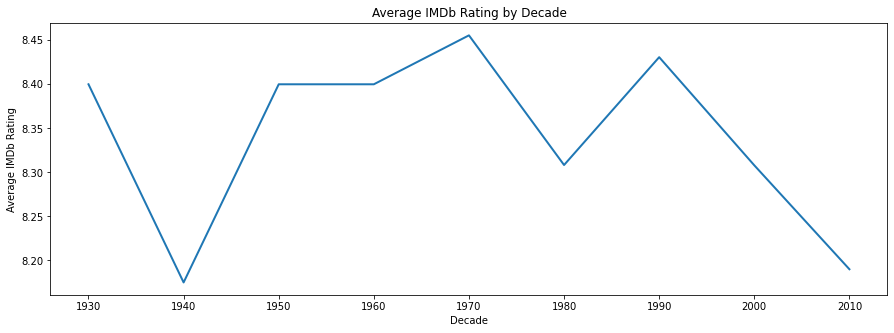

In [4]:
# Create a bar chart to visualize the results
ratings_by_decade = df.groupby('decade_of_release')['imdb_rating'].mean()
ratings_by_decade.plot(kind='line', linewidth=2, figsize=(15, 5))
plt.xlabel('Decade')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Decade')
plt.show()

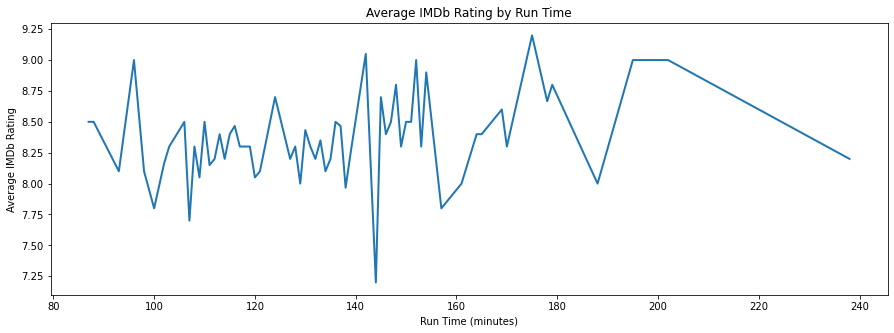

In [5]:
# Create a bar chart to visualize the results
ratings_by_runtime = df.groupby(['run_time'])['imdb_rating'].mean()
ratings_by_runtime.plot(kind='line', linewidth=2, figsize=(15, 5))
plt.xlabel('Run Time (minutes)')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Run Time')
plt.show()

In [6]:
# MOVIE RECOMMENDATION?!
favorite_movie = 'The Dark Knight'
favorite_genre = 'Action'
genre_movies = df[df['genre'].str.contains(favorite_genre)]
genre_movies = genre_movies.sort_values('imdb_rating', ascending=False)
top_movies = list(genre_movies[genre_movies['movie_name'] != favorite_movie].head(5)['movie_name'])
pd.DataFrame(top_movies)

,0
0,The Lord of the Rings: The Return of the King
1,Inception
2,The Lord of the Rings: The Two Towers
3,The Lord of the Rings: The Fellowship of the Ring
4,Star Wars: Episode V - The Empire Strikes Back
